# Task 4 - Change of patterns throughout the dataset

This code will produce a horizontal stacked bar chart where each bar represents a month, and the segments within each bar show the distribution of check-ins across different venue types.

/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_99511/1823727449.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['timestamp'].dt.to_period('M')


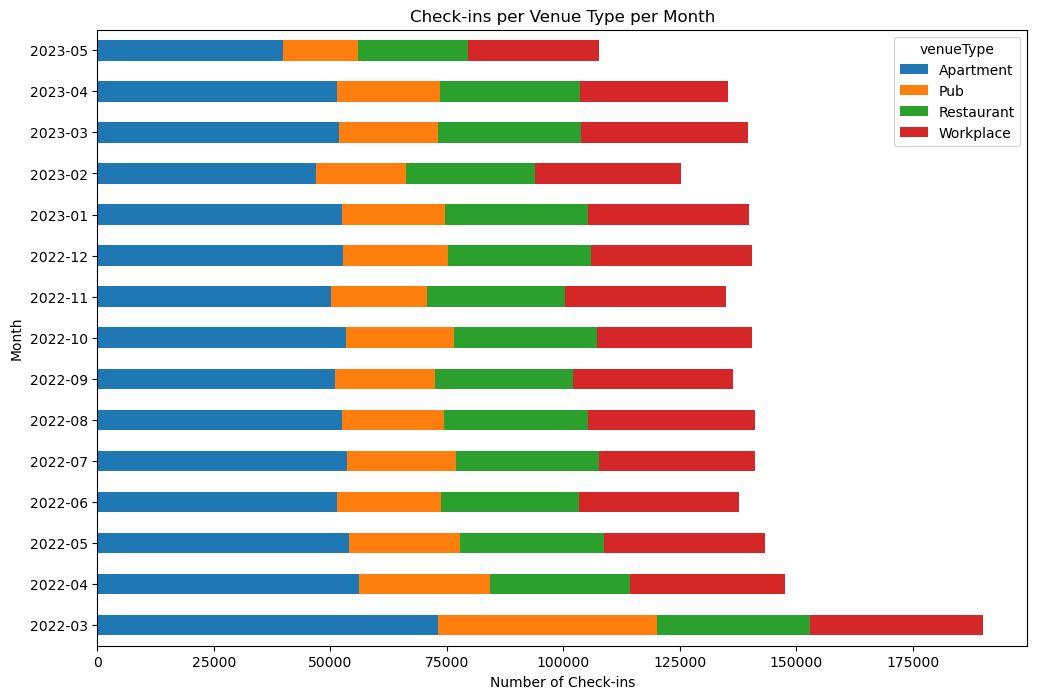

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../Datasets/Journals/CheckinJournal.csv')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year-month from the timestamp for grouping
df['year_month'] = df['timestamp'].dt.to_period('M')

# Group by venue type and year-month, and count the number of check-ins
checkin_counts = df.groupby(['venueType', 'year_month']).size().unstack(fill_value=0)

# Plotting
checkin_counts.T.plot(kind='barh', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Check-ins per Venue Type per Month')
plt.xlabel('Number of Check-ins')
plt.ylabel('Month')

# Show the plot
plt.show()
